In [19]:
from pathlib import Path
from hjelpefunksjonar import f2t

%matplotlib widget
import pickle

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

from check_collision import check_all_collisions
from f import f
from rib import Rib

plt.rcParams["font.family"] = "STIXGeneral"
plt.rcParams['mathtext.fontset'] = 'stix'

with open("./data/rib50_Q40_1.pickle",'rb') as fil:
    tre = pickle.load(fil)
del fil


partikkelfil= Path("./partikkelsimulasjonar/particles_rib50_Q40_1_BDF_200_[0.05, 0.06]_1e-01_linear.pickle")
partikkelfil= Path("./runs/rib50_Q40_1/BDF_RK23_200_[0.05, 0.06]_1_1e-01_linear_test.pickle")

with open(partikkelfil, 'rb') as fil:
    partiklar = pickle.load(fil)


ribs = []
for r in tre.ribs:
    ribs.append(Rib(r))

skalering = 1
myDPI = 300

x = (ribs[0].get_rib_middle()[0],ribs[1].get_rib_middle()[0])
x_width = x[1] - x[0]



In [20]:
plt.close('all') 

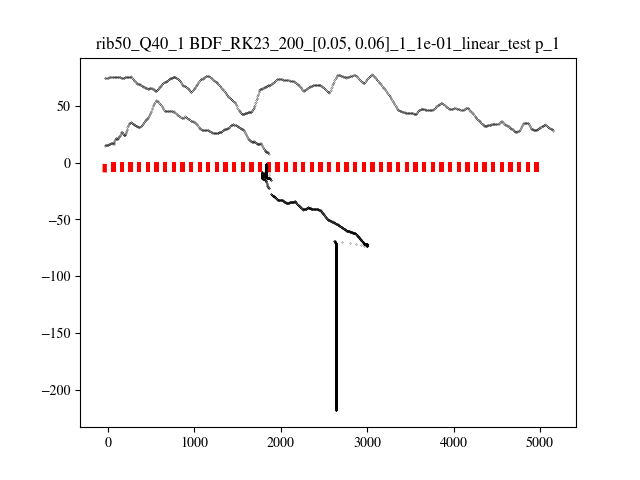

In [21]:
fig, ax  = plt.subplots()
ax.add_patch(Polygon(ribs[0].vertices, facecolor='red'))
for i in range(50):
    ax.add_patch(Polygon(ribs[1].vertices+ i* np.asarray([x_width, 0]), facecolor='red'))

for p in partiklar:
    sti = p.sti_dict
    init = int(sti['init_time'])
    final = int(sti['final_time'])
    plott_array = np.zeros((final+1-init,4))
    for frame in range(init,final+1):
        plott_array[frame-init,:] = np.asarray(sti[frame]['position'])+np.asarray([sti[frame]['loops']*x_width,0,0,0])
# if not np.any(plott_array[:,1]<0):
    #     continue
    
    ax.plot(plott_array[:,0], plott_array[:,1], "ko", markersize=0.2)
    
    ax.set_title(f"{partikkelfil.parent.name} {partikkelfil.stem} p_{p.index}")
    if p.index > 0:
        break